# Get AMeDAS stations information

## Example: Retrieving AMEDAS Station Information

This example demonstrates how to use the `AmedasData` class from the `jma_data_tools` library to retrieve information about specific AMEDAS stations. The example covers three different functionalities: getting information for a specific station, listing stations in a specific region, and finding stations within a given geographical range.

### Code Breakdown

1. **Import the `AmedasData` Class**:
   ```python
   from jma_data_tools import AmedasData
   ```
   The `AmedasData` class is imported from the `jma_data_tools` library to interact with AMEDAS station data.

2. **Retrieve Information for a Specific Station**:
   ```python
   # Test: Get information for a specific station ID
   station_id = 47646  # Replace with actual station ID
   print(f"Information for station ID {station_id}:")
   print(AmedasData.get_station_info(station_id))
   ```
   The `get_station_info()` method is used to get detailed information about a specific AMEDAS station based on its station ID (`47646` in this case). This information is then printed to the console.

3. **List Stations in a Specific Prefecture (`fuken_id`)**:
   ```python
   # Test: Get stations in a specific fuken_id
   fuken_id = 11  # Replace with actual fuken_id
   print(f"Stations in fuken_id {fuken_id}:")
   stations_in_fuken = AmedasData.get_stations_by_fuken_id(fuken_id)
   for station_id, info in stations_in_fuken.items():
       print(f"Station ID: {station_id}, Name: {info['station_name']}")
   ```
   The `get_stations_by_fuken_id()` method retrieves all AMEDAS stations within a specific prefecture, identified by `fuken_id`. The resulting list of stations is iterated over, and the station ID and name are printed for each station.

4. **Get Stations within a Latitude and Longitude Range**:
   ```python
   # Test: Get stations in a latitude and longitude range
   lat_min, lat_max = 35.0, 37.0
   lon_min, lon_max = 139.0, 141.0
   print(f"Stations in the specified latitude and longitude range:")
   stations_in_range = AmedasData.get_stations_by_location_range(lat_min, lat_max, lon_min, lon_max)
   for station_id, info in stations_in_range.items():
       print(f"Station ID: {station_id}, Name: {info['station_name']}")
   ```
   The `get_stations_by_location_range()` method is used to find all AMEDAS stations within a specified geographical area defined by latitude and longitude bounds (`lat_min`, `lat_max`, `lon_min`, `lon_max`). Each station's ID and name are printed to the console.

### Summary

This example shows how to interact with AMEDAS station data using the `AmedasData` class from the `jma_data_tools` library. You can:

- Retrieve detailed information for a specific station using its station ID.
- List all stations within a specific prefecture (`fuken_id`).
- Find all stations within a specified geographical latitude and longitude range.

These methods are useful for querying and exploring AMEDAS station metadata, which is valuable for further data analysis and visualization tasks.

In [3]:
from jma_data_tools import AmedasData
# Test: Get information for a specific station ID
station_id = 47646  # Replace with actual station ID
print(f"Information for station ID {station_id}:")
print(AmedasData.get_station_info(station_id))

# Test: Get stations in a specific fuken_id
fuken_id = 11  # Replace with actual fuken_id
print(f"Stations in fuken_id {fuken_id}:")
stations_in_fuken = AmedasData.get_stations_by_fuken_id(fuken_id)
for station_id, info in stations_in_fuken.items():
    print(f"Station ID: {station_id}, Name: {info['station_name']}")

# Test: Get stations in a latitude and longitude range
lat_min, lat_max = 35.0, 37.0
lon_min, lon_max = 139.0, 141.0
print(f"Stations in the specified latitude and longitude range:")
stations_in_range = AmedasData.get_stations_by_location_range(lat_min, lat_max, lon_min, lon_max)
for station_id, info in stations_in_range.items():
    print(f"Station ID: {station_id}, Name: {info['station_name']}")

Information for station ID 47646:
{'station_name': 'つくば(館野)', 'station_name_kana': 'ツクバ（タテノ）', 'station_name_roman': 'Tsukuba（Tateno）', 'fuken_id': 40, 'type': 'S', 'longitude': 140.125, 'latitude': 36.0566666667, 'height': 25.2}
Stations in fuken_id 11:
Station ID: 47401, Name: 稚内
Station ID: 2, Name: 沓形
Station ID: 3, Name: 浜頓別
Station ID: 47402, Name: 北見枝幸
Station ID: 5, Name: 歌登
Station ID: 1051, Name: 中頓別
Station ID: 1054, Name: 豊富
Station ID: 1203, Name: 沼川
Station ID: 1207, Name: 船泊
Station ID: 1284, Name: 宗谷岬
Station ID: 1285, Name: 浜鬼志別
Station ID: 1512, Name: 本泊
Station ID: 1528, Name: 声問
Station ID: 1546, Name: 礼文
Station ID: 1593, Name: 幌泊
Station ID: 1573, Name: 幌延
Stations in the specified latitude and longitude range:
Station ID: 311, Name: 田代山
Station ID: 312, Name: 東白川
Station ID: 47598, Name: 小名浜
Station ID: 1607, Name: 山田
Station ID: 314, Name: 花園
Station ID: 315, Name: 北茨城
Station ID: 316, Name: 大子
Station ID: 317, Name: 神峰山
Station ID: 318, Name: 笠間
Station ID: 476

# Download and plot ground based data (hourly and daily)

### Hourly data

This example demonstrates how to use the `JMAGroundDataDownloader` class from the `jma_data_tools` library to download hourly weather data from the Japan Meteorological Agency's AMEDAS system and visualize it using the `JMADataPlotter` class.

### Code Breakdown

1. **Import Required Libraries**:
   ```python
   from jma_data_tools import JMAGroundDataDownloader
   import pandas as pd
   ```
   The necessary libraries are imported. `JMAGroundDataDownloader` is used for downloading AMEDAS data, and `pandas` is used for working with dates and dataframes.

2. **Initialize the Downloader**:
   ```python
   downloader = JMAGroundDataDownloader(output_path='ground_data')
   ```
   The downloader is initialized, specifying `ground_data` as the directory where downloaded data will be saved.

3. **Define Test Parameters**:
   ```python
   station_id = '47646'  # Example station ID (e.g., Tsukuba station)
   test_date = pd.Timestamp('2022-02-01')  # Example date
   ```
   Test parameters are defined, including the station ID (`47646`), which represents a specific AMEDAS station (e.g., Tsukuba), and a test date (`2022-02-01`).

4. **Download Hourly Data**:
   ```python
   hourly_data, url = downloader.download_amedas(station_id, test_date, dtype='hourly')
   ```
   The `download_amedas()` method is called with the specified station ID and date to download hourly data. The method returns the downloaded data (`hourly_data`) and the URL used for downloading.

5. **Check and Print Data**:
   ```python
   if not hourly_data.empty:
       print("Hourly data downloaded successfully. URL:", url)
       print(hourly_data.head())
   ```
   The script checks if the downloaded data is not empty. If successful, it prints a confirmation message, the URL, and the first few rows of the data.

6. **Plot Data**:
   ```python
   from jma_data_tools import JMADataPlotter 
   plotter = JMADataPlotter()
   plotter.plot_hourly_temp_hum_wind(hourly_data)
   ```
   If the data was successfully downloaded, the `JMADataPlotter` class is used to visualize it. Specifically, the `plot_hourly_temp_hum_wind()` method is called to plot temperature, humidity, and wind data from the `hourly_data` dataframe.




dowloaded:  http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=40&block_no=47646&year=2022&month=02&day=01&view=
Hourly data downloaded successfully. URL: http://www.data.jma.go.jp/obd/stats/etrn/view/hourly_s1.php?prec_no=40&block_no=47646&year=2022&month=02&day=01&view=
                     glp_hPa  slp_hPa  precip_mm  temp_C  dewtemp_C  \
2022-02-01 01:00:00   1014.2   1017.7        NaN    -1.1       -9.0   
2022-02-01 02:00:00   1014.7   1018.2        NaN    -2.4       -8.9   
2022-02-01 03:00:00   1014.6   1018.1        NaN    -0.9       -7.3   
2022-02-01 04:00:00   1014.9   1018.4        NaN    -2.1       -7.4   
2022-02-01 05:00:00   1014.5   1018.0        NaN     0.8       -6.7   

                     vapor-pres_hPa  rh_percent  wspd_ms  wdir_deg  sunlit_h  \
2022-02-01 01:00:00             3.1          55      1.4     292.5       NaN   
2022-02-01 02:00:00             3.1          61      1.0     292.5       NaN   
2022-02-01 03:00:00             3.5        

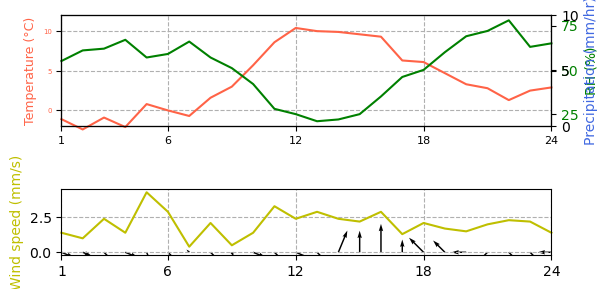

In [6]:
from jma_data_tools import JMAGroundDataDownloader
import pandas as pd

# Initialize the downloader
downloader = JMAGroundDataDownloader(output_path='ground_data')

# Test Parameters
station_id = '47646'  # Example station ID (e.g., Tsukuba station)
test_date = pd.Timestamp('2022-02-01')  # Example date
    
hourly_data, url = downloader.download_amedas(station_id, test_date, dtype='hourly')
if not hourly_data.empty:
    print("Hourly data downloaded successfully. URL:", url)
    print(hourly_data.head())
    from jma_data_tools import JMADataPlotter 
    plotter = JMADataPlotter()
    plotter.plot_hourly_temp_hum_wind(hourly_data)
        
else:
    print("Failed to download hourly data or data is empty.")
    
    

### Daily data

This example demonstrates how to use the `JMAGroundDataDownloader` class from the `jma_data_tools` library to download 30 years of daily AMEDAS data. The data is saved in the specified output directory, and the process loops over each month to download data sequentially.

### Code Breakdown

1. **Import Required Libraries**:
   ```python
   import pandas as pd
   from jma_data_tools import JMAGroundDataDownloader
   import time
   import os
   ```
   The necessary libraries are imported. `pandas` is used for date management, `JMAGroundDataDownloader` is used for downloading AMEDAS data, and `time` and `os` are used for managing sleep intervals and directories.

2. **Initialize the Downloader**:
   ```python
   downloader = JMAGroundDataDownloader(output_path='ground_data')
   ```
   The downloader is initialized with the specified output path (`ground_data`) where the downloaded files will be saved.

3. **Set Up Parameters**:
   ```python
   point = '47646'  # Example: Tsukuba station
   output_dir = "daily_data"  # Directory to save daily data files
   start_date = pd.Timestamp('2021-01-01')
   end_date = pd.Timestamp('2021-03-01')
   ```
   Parameters for the download are set up, including:
   - **`point`**: The station ID (`47646`), which represents a specific AMEDAS station (e.g., Tsukuba).
   - **`output_dir`**: Directory where the daily data will be saved.
   - **`start_date`** and **`end_date`**: Date range for downloading data.

4. **Generate Date Range**:
   ```python
   date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
   ```
   A date range is generated from the start date to the end date with a frequency of **`'MS'`** (month start), so that each month can be iterated over.

5. **Download Data for Each Date**:
   ```python
   for date in date_range:
       print(f"Downloading data for {date.strftime('%Y-%m-%d')}...")
       # Download the daily data for the specified point and date
       daily_data = downloader.download_amedas(point, date, dtype='daily')
       time.sleep(0.5)
   ```
   A loop iterates over each date in the date range:
   - For each month, the `download_amedas()` method is called to download daily data for the specified station.
   - A **`time.sleep(0.5)`** is added to avoid overloading the server with too many requests in a short time.

6. **Completion Message**:
   ```python
   print("Download complete.")
   ```
   A completion message is printed once the download is finished.

### Summary

This example illustrates how to automate the downloading of daily AMEDAS data for a specific station over a period of time using the `JMAGroundDataDownloader` class. The use of a date range and a loop makes it easy to systematically download monthly data. The sleep interval is added to prevent overwhelming the server and ensure compliance with access restrictions.

This process can be easily adapted for different stations, date ranges, or data types, depending on the user's requirements.


In [2]:
import pandas as pd
from jma_data_tools import JMAGroundDataDownloader
import time
import os

# Initialize the downloader
downloader = JMAGroundDataDownloader( output_path= 'ground_data' )

# Set up parameters
point = '47646'  # Example: Tsukuba station
output_dir = "daily_data"  # Directory to save daily data files
start_date = pd.Timestamp('2021-01-01')
end_date = pd.Timestamp('2021-03-01')

# Generate date range for 30 years of daily data
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
# Loop over each date to download daily data
for date in date_range:
    print(f"Downloading data for {date.strftime('%Y-%m-%d')}...")
    # Download the daily data for the specified point and date
    daily_data = downloader.download_amedas(point, date, dtype='daily')
    time.sleep(0.5)

print("Download complete.")


dowloaded:  http://www.data.jma.go.jp/obd/stats/etrn/view/daily_s1.php?prec_no=40&block_no=47646&year=2021&month=01&day=&view=
dowloaded:  http://www.data.jma.go.jp/obd/stats/etrn/view/daily_s1.php?prec_no=40&block_no=47646&year=2021&month=02&day=&view=
dowloaded:  http://www.data.jma.go.jp/obd/stats/etrn/view/daily_s1.php?prec_no=40&block_no=47646&year=2021&month=03&day=&view=
Download complete.


# Download and plot upper air data

2022-06-01 09:00:00
*** 指定気圧面の観測データ ****
trying to access:   https://www.data.jma.go.jp/obd/stats/etrn/upper/view/hourly_usp.php?year=2022&month=06&day=01&hour=9&atm=&point=47646&view=
*** 気温・湿度の観測データ ****
trying to access:   https://www.data.jma.go.jp/obd/stats/etrn/upper/view/daily_uth.php?year=2022&month=06&day=01&hour=9&atm=&point=47646&view=
*** 風の観測データ ****
trying to access:   https://www.data.jma.go.jp/obd/stats/etrn/upper/view/daily_uwd.php?year=2022&month=06&day=01&hour=9&atm=&point=47646&view=
upperair_data/47646/


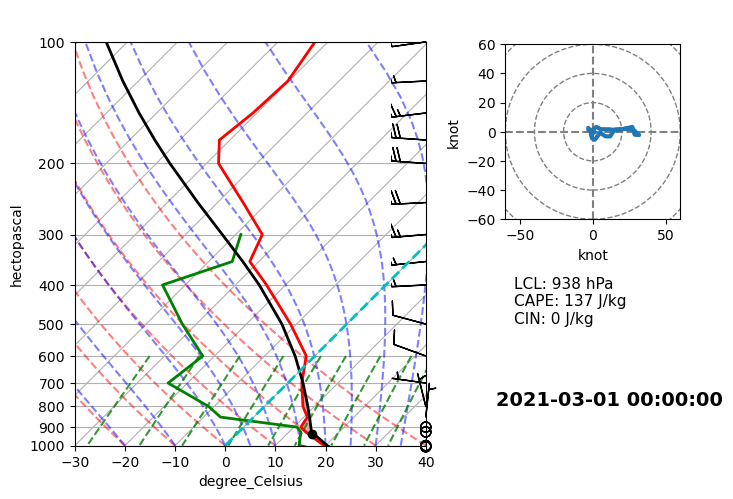

In [4]:
from jma_data_tools import JMAUpperAirDownloader
# Initialize the downloader
downloader = JMAUpperAirDownloader(output_path='upperair_data')
    
from jma_data_tools import JMADataPlotter
    
kansho = [47401, 47412, 47418, 47582, 47600, 47646,
          47678, 47741, 47778, 47807, 47827, 47909,
          47918, 47945, 47971, 47991, 
          89532] # last one is Showwa Kichi
    

test_point = '47646'  # Example station code for Tsukuba
test_date = pd.Timestamp('2022-06-01 09:00')
    
data = downloader.download_sounding_data(test_point, test_date)
plotter = JMADataPlotter()
plotter.plot_sounding(data, date)
    